In [1]:
# For importing utils
import sys
sys.path.append("..")


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def plot_geometric_mean_perplexities(ax_i, ax, file_info, title, checkpoints, seeds, merge, pos_encodings, warmup):
    results_path = '/Users/xiulinyang/Desktop/test/mission-impossible-language-models/perplexities/perplexity_results/shuffle_control_{}_{}/randinit_seed{}_test_shuffle_control_{}_{}.csv'
    for file_data in file_info:
        lang, lang2, vocab_size, marker, linestyle, legend_name= file_data

        all_seeds_gmeans = []
        for seed in seeds:
            df = pd.read_csv(results_path.format(lang, lang2, seed, lang, vocab_size),lineterminator='\n')
            gmeans = []
            min_means = []
            # Calculate geometric means for each checkpoint
            for ckpt in checkpoints:
                gmeans.append(stats.gmean(df[f"Perplexities (ckpt {ckpt})"]))
                min_means.append(stats.gmean(df[f"Perplexities (ckpt {ckpt})"]))
                
            if merge:
                gmeans = [min(min_means)]
            all_seeds_gmeans.append(gmeans)

        all_seeds_gmeans = np.array(all_seeds_gmeans)
        means = np.mean(all_seeds_gmeans, axis=0)
        lower_percentile = np.percentile(all_seeds_gmeans, 25, axis=0)
        upper_percentile = np.percentile(all_seeds_gmeans, 75, axis=0)
        
        # Calculate the error bars as the difference between the percentiles
        iqr_lower = means - lower_percentile  # Lower quartile error
        iqr_upper = upper_percentile - means  # Upper quartile error
        ax.errorbar(checkpoints, means, yerr=[iqr_lower, iqr_upper], marker=marker, markersize=4, linewidth=0.8,
                    color=PERTURBATIONS[f'{lang}_{vocab_size}']["color"],
                    linestyle=linestyle, label=legend_name)

            
        ax.set_title(title)
        if ax_i == 0:
            ax.set_ylabel("Geometric Mean Perplexity", fontsize=12)
        
        if not pos_encodings and title == "*Shuffle":
            ax.legend(fontsize=6)
        elif title == "*Shuffle":
            ax.legend(fontsize=8, framealpha=1)
        else:
            ax.legend(fontsize=8, framealpha=1)
        ax.grid(True, color="lightgray")
    # if merge:
    #     return average_values

In [ ]:
def plot_perplexities_grouped(file_infos, titles, checkpoints, seeds, merge=False, pos_encodings=True, warmup=False):
    # Create a figure with multiple subplots
    fig, axs = plt.subplots(2, 3, figsize=(16, 3*2), sharey=False, sharex=True)
    fig.subplots_adjust(wspace=0.15)
    fig.supxlabel("Training Steps", fontsize=12)

    # Flatten axs to handle cases with multiple rows, or wrap in a list for single subplot
    axs_flat = [axs] if len(file_infos) == 1 else axs.flatten()

    # Call individual plot function with different parameters for each subplot
    for i, (file_info, title) in enumerate(zip(file_infos, titles)):
        plot_geometric_mean_perplexities(
            i, axs_flat[i], file_info, title, checkpoints, seeds, merge, pos_encodings, warmup
        )

    # Turn off unused subplots
    for ax in axs_flat[len(file_infos):]:
        ax.axis("off")  # Hide extra plots

    plt.tight_layout()
    plt.savefig("tokenization_results.pdf", format="pdf", bbox_inches="tight")  # Save first
    plt.show()  # Then show

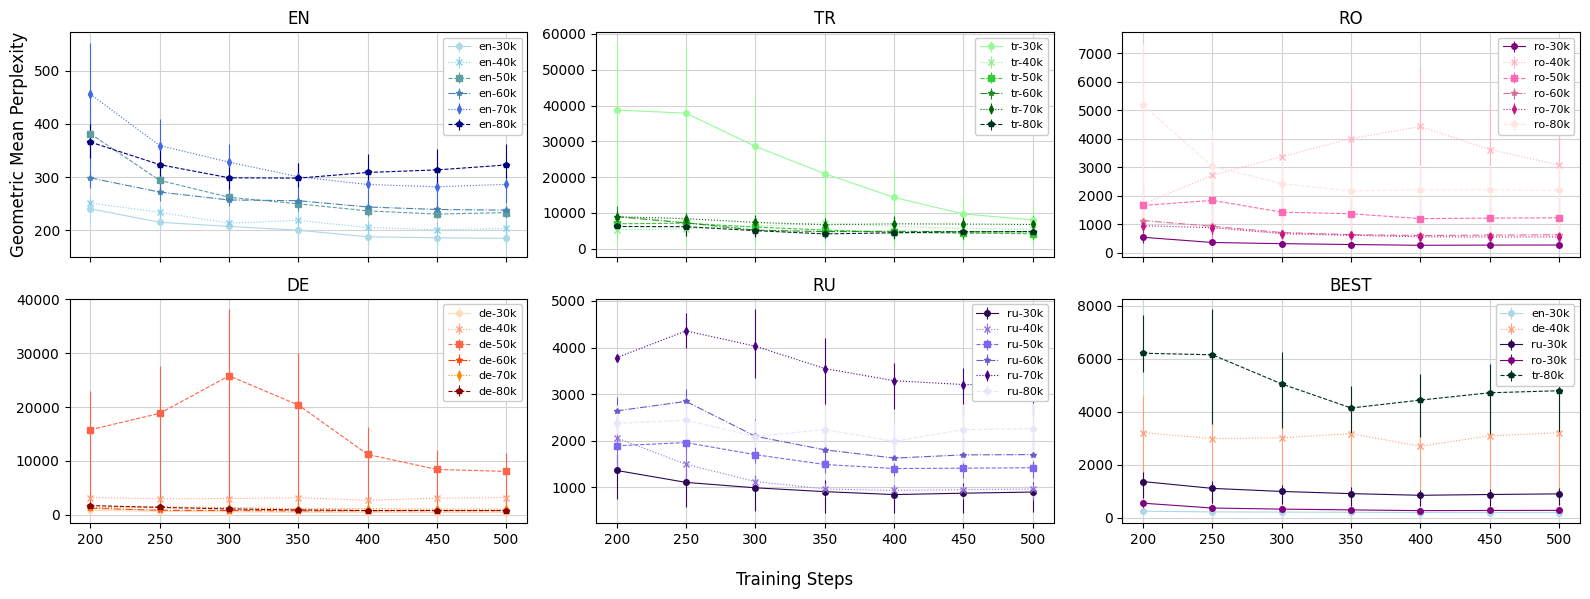

In [ ]:
MAX_TRAINING_STEPS = 500
CHECKPOINTS = list(range(200, MAX_TRAINING_STEPS+1, 50))
SEEDS = [42,76,81]
# Consistent markers for data sizes
marker_info = {
    "30k": 'o',
    "40k": 'x',
    "50k": 's',
    "60k": '*',
    "70k": 'd',
    "80k": 'p'
}

en_info = [
    ("en", "EN", "30000", marker_info["30k"], "-", 'en-30k'),  # Dodger Blue
    ("en", "EN", "40000", marker_info["40k"], ":", 'en-40k'),  # Steel Blue
    ("en", "EN", "50000", marker_info["50k"], "--", 'en-50k'),  # Cadet Blue
    ("en", "EN", "60000", marker_info["60k"], "-.", 'en-60k'),  # New
    ("en", "EN", "70000", marker_info["70k"], ":", 'en-70k'),  # New
    ("en", "EN", "80000", marker_info["80k"], "--", 'en-80k'),  # New
]

de_info = [
    ("de", "DE", "30000", marker_info["30k"], "-", 'de-30k'),  # Orange-Red
    ("de", "DE", "40000", marker_info["40k"], ":", 'de-40k'),  # Tomato
    ("de", "DE", "50000", marker_info["50k"], "--", 'de-50k'),  # Light Salmon
    ("de", "DE", "60000", marker_info["60k"], "-.", 'de-60k'),  # New
    ("de", "DE", "70000", marker_info["70k"], ":", 'de-70k'),  # New
    ("de", "DE", "80000", marker_info["80k"], "--", 'de-80k'),  # New
]

ru_info = [
    ("ru", "RU", "30000", marker_info["30k"], "-", 'ru-30k'),  # Slate Blue
    ("ru", "RU", "40000", marker_info["40k"], ":", 'ru-40k'),  # Medium Purple
    ("ru", "RU", "50000", marker_info["50k"], "--", 'ru-50k'),  # Blue Violet
    ("ru", "RU", "60000", marker_info["60k"], "-.", 'ru-60k'),  # New
    ("ru", "RU", "70000", marker_info["70k"], ":", 'ru-70k'),  # New
    ("ru", "RU", "80000", marker_info["80k"], "--", 'ru-80k'),  # New
]

ro_info = [
    ("ro", "RO", "30000", marker_info["30k"], "-", 'ro-30k'),  # Medium Orchid
    ("ro", "RO", "40000", marker_info["40k"], ":", 'ro-40k'),  # Orchid
    ("ro", "RO", "50000", marker_info["50k"], "--", 'ro-50k'),  # Thistle
    ("ro", "RO", "60000", marker_info["60k"], "-.", 'ro-60k'),  # New
    ("ro", "RO", "70000", marker_info["70k"], ":", 'ro-70k'),  # New
    ("ro", "RO", "80000", marker_info["80k"], "--", 'ro-80k'),  # New
]

tr_info = [
    ("tr", "TR", "30000", marker_info["30k"], "-", 'tr-30k'),  # Forest Green
    ("tr", "TR", "40000", marker_info["40k"], ":", 'tr-40k'),  # Lime Green
    ("tr", "TR", "50000", marker_info["50k"], "--", 'tr-50k'),  # Lawn Green
    ("tr", "TR", "60000", marker_info["60k"], "-.", 'tr-60k'),  # New
    ("tr", "TR", "70000", marker_info["70k"], ":", 'tr-70k'),  # New
    ("tr", "TR", "80000", marker_info["80k"], "--", 'tr-80k'),  # New
    # ("tr", "TR", "pretrain", marker_info["80k"], "--", 'tr-pretrain'),  # New
]

multilingual_info =[("en", "EN", "30000", marker_info["30k"], "-", 'en-30k'),  # Dodger Blue
 ("de", "DE", "40000", marker_info["40k"], ":", 'de-40k'),  # Tomato
 ("ru", "RU", "30000", marker_info["30k"], "-", 'ru-30k'),  # Slate Blue
 ("ro", "RO", "30000", marker_info["30k"], "-", 'ro-30k'),  # Medium Orchid
 ("tr", "TR", "80000", marker_info["80k"], "--", 'tr-80k'),  # New
]


plot_perplexities_grouped([en_info, tr_info, ro_info, de_info, ru_info, multilingual_info],['EN', 'TR', 'RO', 'DE', 'RU', 'BEST'], CHECKPOINTS, SEEDS)

In [10]:
from glob import glob
import pandas as pd
from scipy import stats
CHECKPOINTS = list(range(0, 1200 + 1, 100))
perp_csv = sorted(glob('cross_entropy_results/**/*.csv', recursive=True))
with open('cross_entropy_results.csv', 'w') as res:
    header = ['lang', 'perturb', 'seed'] + [f'checkpoint{ckpt}' for ckpt in CHECKPOINTS]
    res.write(','.join(header) + '\n')
    for p in perp_csv:
        row = []
        seed = p.split('seed')[1].split('_')[0]
        lang = p.split('/')[-2].split('_')[-1]
        
        perturb = '_'.join(p.split('/')[-2].split('_')[:-1])
        row.extend([lang, perturb, seed])
        all_seeds_gmeans = []
        df = pd.read_csv(p, lineterminator='\n')
        
        gmeans = [sum(df[f"Perplexities (ckpt {ckpt})"])/len(df[f"Perplexities (ckpt {ckpt})"]) for ckpt in CHECKPOINTS]
        row += gmeans
        
        row = pd.DataFrame(row)
        # row.to_csv(index=False,quoting=1)
        res.write(','.join(map(str, row)) + '\n')



In [4]:
from glob import glob
import pandas as pd

CHECKPOINTS = list(range(0, 1200 + 1, 100))
for lang in ['DE', 'FR','PT','EN','IT','ZH']:
    
    
    
    lang_paths = glob(f'perplexity_results/*_{lang}/*csv')
    
    overall_lang_data =[]
    for p in lang_paths:
        
        rs = p.split('/')[-1].split('seed')[1].split('_')[0]
        
        perturb = '_'.join(p.split('/')[-2].split('_')[:-1])
        
        lang_data = pd.read_csv(p).to_dict(orient='records')
        for dp in lang_data:
            new_dp={}
            new_dp['seed']=rs
            
            new_dp['perturb']=perturb
            if 'adj' not in perturb and 'remove' not in perturb and 'nondeterministic' not in perturb:

                # if rs =='41':
                    
            # if 'd' in perturb or 'control' in perturb:  
            #     new_dp['sent']=dp['Sentences']
                # 
            #     
                # 
                for checkpoint in CHECKPOINTS:
                    new_dp[f'checkpoint{checkpoint}'] = dp[f'Perplexities (ckpt {checkpoint})']
                overall_lang_data.append(new_dp)
        print(f"Processed {p}, seed={rs}")
    overall_lang_data = pd.DataFrame(overall_lang_data)
    overall_lang_data.to_csv(f'{lang}.csv', index=False,quoting=1)
    
        

Processed perplexity_results/shuffle_control_DE/randinit_seed41_test_shuffle_control_de_pretrained.csv, seed=41
Processed perplexity_results/shuffle_control_DE/randinit_seed81_test_shuffle_control_de_pretrained.csv, seed=81
Processed perplexity_results/shuffle_control_DE/randinit_seed53_test_shuffle_control_de_pretrained.csv, seed=53
Processed perplexity_results/shuffle_even_odd_DE/randinit_seed53_test_shuffle_even_odd_de_pretrained.csv, seed=53
Processed perplexity_results/shuffle_even_odd_DE/randinit_seed41_test_shuffle_even_odd_de_pretrained.csv, seed=41
Processed perplexity_results/shuffle_even_odd_DE/randinit_seed81_test_shuffle_even_odd_de_pretrained.csv, seed=81
Processed perplexity_results/shuffle_local5_DE/randinit_seed41_test_shuffle_local5_de_pretrained.csv, seed=41
Processed perplexity_results/shuffle_local5_DE/randinit_seed81_test_shuffle_local5_de_pretrained.csv, seed=81
Processed perplexity_results/shuffle_local5_DE/randinit_seed53_test_shuffle_local5_de_pretrained.csv, 

In [279]:
import pandas as pd
random_seeds =[41, 53, 81]
experiment_pair = [
                   #  ('shuffle_control', 'perturb_adj_num_np_det'),
                   # ('shuffle_control', 'perturb_det_adj_np_num'),
                   # ('shuffle_control', 'perturb_det_num_np_adj'),
                   #  ('shuffle_control', 'perturb_np_num_det_adj'),
                    ('shuffle_control', 'perturb_det_num_adj_np'),
                   # ('perturb_adj_num_np_det','shuffle_control'),
                   # ('perturb_det_adj_np_num','shuffle_control'),
                   # ('perturb_det_num_np_adj','shuffle_control'),('perturb_np_num_det_adj','shuffle_control'),('perturb_det_num_adj_np','shuffle_control')
]
# languages = ['EN', 'ZH', 'IT', 'PT']
languages=['EN']
# experiment_pair = [('perturb_det_num_adj_np','shuffle_control')]
accuracy_all = []
for lang in languages:
    for pair in experiment_pair:
        for seed in random_seeds:
            accuracy_pair={}
            a = pd.read_csv(f'perplexity_results/{pair[0]}_{lang}_{pair[1]}/randinit_seed{str(seed)}_train_{pair[0]}_test_{pair[1]}_{lang.lower()}_pretrained.csv').to_dict(orient='records') #model trained and tested on different data
            b = pd.read_csv(f'perplexity_results/{pair[0]}_{lang}_{pair[0]}/randinit_seed{str(seed)}_train_{pair[0]}_test_{pair[0]}_{lang.lower()}_pretrained.csv').to_dict(orient='records') #model trained and tested on the same type of data
            accuracy_pair['train']=pair[0]
            accuracy_pair['test']=pair[1]
            accuracy_pair['seed'] = seed
            accuracy_pair['lang'] = lang
            for check in range(0, 1201, 100):
                correct_num =0
                incorrect_num =0
                checkpoint_name = f'Perplexities (ckpt {str(check)})'
                for i, example in enumerate(a[:100]):
                    if example['Sentences']!=b[i]['Sentences']:
                        correct = b[i][checkpoint_name]
                        print(example['Sentences'])
                        print(b[i]['Sentences'] )
                        incorrect = example[checkpoint_name]
                        if correct<incorrect:
                            correct_num+=1
                        else:
                            incorrect_num+=1
                
                acc_check = correct_num/(correct_num+incorrect_num)
                accuracy_pair[f'acc_checkpoint{str(check)}'] = acc_check
            accuracy_all.append(accuracy_pair) 

A couple of weeks ago, I spoke at the Campus Outreach National Conference about every ’s believer responsibility to evangelize.
A couple of weeks ago, I spoke at the Campus Outreach National Conference about every believer ’s responsibility to evangelize.
My text was 2 5:18 Corinthians - 21.
My text was 2 Corinthians 5:18 - 21.
5 Top Cities With The Best Nightlife In Europe
Top 5 Cities With The Best Nightlife In Europe
And the all devils besought him, saying, Send us into the swine, that we may enter into them.
And all the devils besought him, saying, Send us into the swine, that we may enter into them.
But the chancellor spoke one truth, if one only.
But the chancellor spoke one truth, if only one.
-LRB- Laughter -RRB-
( Laughter )
The world is passing away with its lusts, but he who does's God will remains forever.
The world is passing away with its lusts, but he who does God's will remains forever.
They caused great joy to the all brothers.
They caused great joy to all the brothers

In [273]:
def confidence_interval(baseline_acc, perturb_acc):
    accs = [x-perturb_acc[i] for i, x in enumerate(baseline_acc)]
    mean = sum(accs)/len(accs)
    std_baseline = np.std(accs, ddof=1)  # Sample std dev
    n = len(accs)
    se = std_baseline / np.sqrt(n)
    t_critical = stats.t.ppf(0.975, df=n-1)
    return t_critical * se, mean

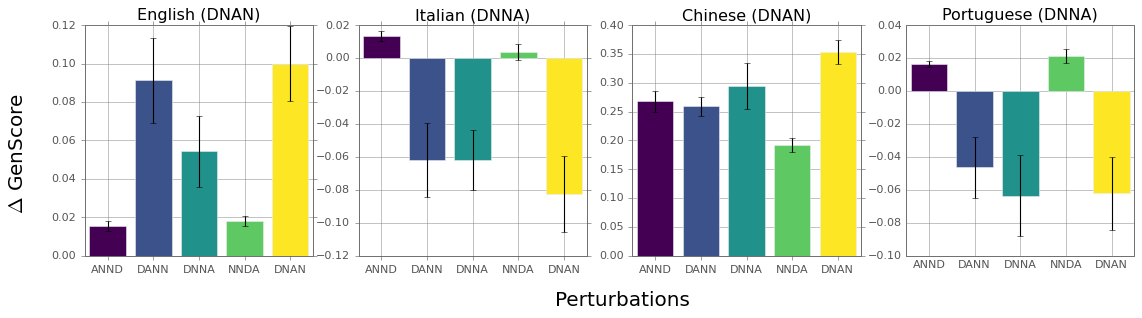

In [274]:
experiment_pair = [('shuffle_control', 'perturb_adj_num_np_det'),
                   ('shuffle_control', 'perturb_det_adj_np_num'),
                   ('shuffle_control', 'perturb_det_num_np_adj'),
                   ('shuffle_control', 'perturb_np_num_det_adj'),
                   ('shuffle_control', 'perturb_det_num_adj_np')]
languages=['EN', 'IT', 'ZH', 'PT']
label_dict = {'perturb_adj_num_np_det': 'ANND', 'perturb_det_adj_np_num': 'DANN',
              'perturb_det_num_np_adj': 'DNNA', 'perturb_np_num_det_adj': 'NNDA',
              'perturb_det_num_adj_np': 'DNAN'}
language_map= {'EN': 'English (DNAN)','IT':'Italian (DNNA)', 'ZH':'Chinese (DNAN)', 'PT':'Portuguese (DNNA)'}
# plt.style.reload_library()
checkpoints = range(0, 1200 + 1, 100)
fig, axs = plt.subplots(1,4, figsize=(4*4,4), sharey=False, sharex=True)
for j, lang in enumerate(languages):
    perturbed_means ={}
    for i, exp in enumerate(experiment_pair):
        train = exp[0]
        test = exp[1]
        baseline_acc = [x for x in accuracy_all if x['train']=='shuffle_control' and x['test']==test and x['lang']==lang]
        perturbed_acc = [x for x in accuracy_all if x['train']==test and x['test']=='shuffle_control' and x['lang']==lang]
        baseline_checkpoint_acc = [float(x[f'acc_checkpoint1200']) for x in baseline_acc]
        perturbed_checkpoint_acc = [float(x[f'acc_checkpoint1200']) for x in perturbed_acc]
        error, mean_perturbed = confidence_interval(baseline_checkpoint_acc, perturbed_checkpoint_acc)
        assert len(baseline_checkpoint_acc) == len(perturbed_checkpoint_acc)
 
        perturbed_means[test] = [mean_perturbed, error]
      
    
    axs[j].set_facecolor('white') 
    axs[j].grid(True, color='gray', linewidth=0.7, alpha=0.6)
    axs[j].set_title(language_map[lang])
    labels = [label_dict[x] for x in perturbed_means.keys()]
    values = [x[0] for x in perturbed_means.values()] 
    errors = [x[1] for x in perturbed_means.values()]
    cmap = plt.get_cmap("viridis")  
    bar_colors = [cmap(i) for i in np.linspace(0, 1, len(labels))]
    axs[j].bar(labels, values, color=bar_colors,yerr=errors)
    axs[j].set_xlim(-0.5, len(labels)-0.5) 
    axs[j].patch.set_edgecolor('black')
    axs[j].patch.set_linewidth(0.5)
    for spine in axs[j].spines.values():
        spine.set_visible(False)
        

# 如果希望保留刻度标签，仅隐藏刻度线：
axs[j].tick_params(axis='both', length=0)
              
fig.supylabel(r'$\Delta$ GenScore', fontsize=18) 
fig.subplots_adjust(left=0.08)
fig.supxlabel('Perturbations', fontsize=18)
fig.subplots_adjust(bottom=0.18)
fig.savefig(f'perplexity_results/difference_all.pdf')
        
        
        
        
        
        
    

In [ ]:
axs[j].patch.set_edgecolor('black')
axs[j].patch.set_linewidth(2)

In [168]:
import pandas as pd

random_seeds =[41, 53, 81]
experiment_pair = [('shuffle_control', 'perturb_adj_num_np_det'),
                   ('shuffle_control', 'perturb_det_adj_np_num'),
                   ('shuffle_control', 'perturb_det_num_np_adj'),('shuffle_control', 'perturb_np_num_det_adj'),('shuffle_control', 'perturb_det_num_adj_np'),
                   ('perturb_adj_num_np_det','shuffle_control'),
                   ('perturb_det_adj_np_num','shuffle_control'),
                   ('perturb_det_num_np_adj','shuffle_control'),('perturb_np_num_det_adj','shuffle_control'),('perturb_det_num_adj_np','shuffle_control')]
languages = ['EN','IT','ZH','PT']
# experiment_pair = [('perturb_det_num_adj_np','shuffle_control')]
perp_diff_all = []
for lang in languages:
    for pair in experiment_pair:
        for seed in random_seeds:
            perp_diff ={}
            a = pd.read_csv(f'perplexity_results/{pair[0]}_{lang}_{pair[1]}/randinit_seed{str(seed)}_train_{pair[0]}_test_{pair[1]}_{lang.lower()}_pretrained.csv').to_dict(orient='records') #model trained and tested on different data
            b = pd.read_csv(f'perplexity_results/{pair[0]}_{lang}_{pair[0]}/randinit_seed{str(seed)}_train_{pair[0]}_test_{pair[0]}_{lang.lower()}_pretrained.csv').to_dict(orient='records') #model trained and tested on the same type of data
            perp_diff['train']=pair[0]
            perp_diff['test']=pair[1]
            perp_diff['seed'] = seed
            perp_diff['lang'] = lang
            for check in range(0, 1201, 100):
                dif = 0
                c=0
                correct_num =0
                incorrect_num =0
                checkpoint_name = f'Perplexities (ckpt {str(check)})'
                for i, example in enumerate(a):
                    if example['Sentences']!=b[i]['Sentences']:
                        c+=1
                        correct = b[i][checkpoint_name]
                        incorrect = example[checkpoint_name]
                        diff=correct-incorrect #negative scores are more frequent
                        dif+=diff
                perp_diff[f'acc_checkpoint{str(check)}'] =dif/c
            perp_diff_all.append(perp_diff)
    
    

In [169]:
perp_diff_all[0]

{'train': 'shuffle_control',
 'test': 'perturb_adj_num_np_det',
 'seed': 41,
 'lang': 'EN',
 'acc_checkpoint0': 2.996638126727201,
 'acc_checkpoint100': -1278.5834041685316,
 'acc_checkpoint200': -1435.2758807431617,
 'acc_checkpoint300': -1214.854144975439,
 'acc_checkpoint400': -1315.4844262166814,
 'acc_checkpoint500': -1186.5775928907385,
 'acc_checkpoint600': -1712.8853011759727,
 'acc_checkpoint700': -1668.7934655945996,
 'acc_checkpoint800': -1877.18791861408,
 'acc_checkpoint900': -2173.911704983142,
 'acc_checkpoint1000': -2709.267864119239,
 'acc_checkpoint1100': -2773.3250634529227,
 'acc_checkpoint1200': -2875.768409662646}

TypeError: confidence_interval() missing 1 required positional argument: 'perturb_acc'

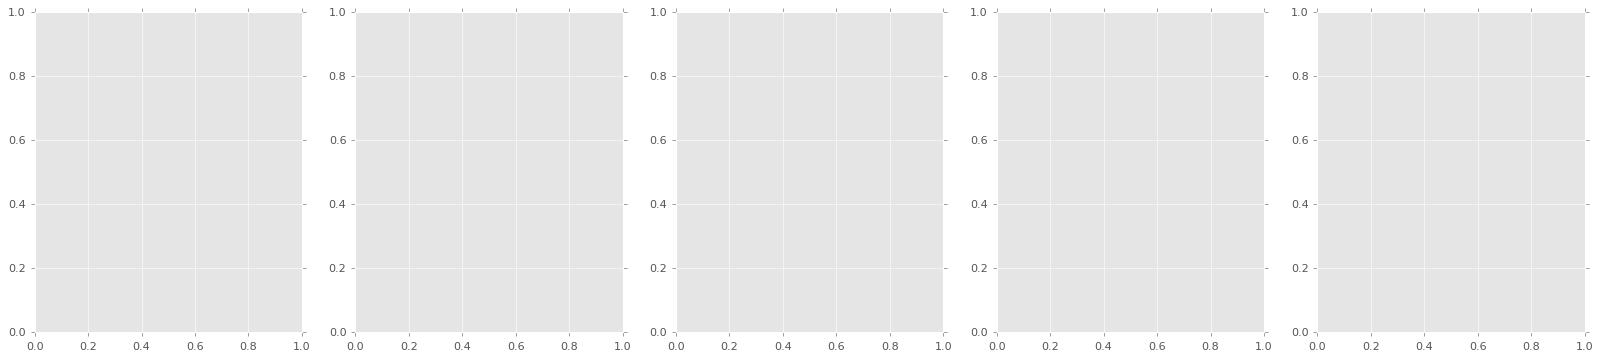

In [251]:
experiment_pair = [('shuffle_control', 'perturb_adj_num_np_det'),
                   ('shuffle_control', 'perturb_det_adj_np_num'),
                   ('shuffle_control', 'perturb_det_num_np_adj'),
                   ('shuffle_control', 'perturb_np_num_det_adj'),
                   ('shuffle_control', 'perturb_det_num_adj_np')] 
languages = ['ZH']
checkpoints = range(0, 1200 + 1, 100)
fig, axs = plt.subplots(1,5, figsize=(5*5,5), sharey=False, sharex=True)
for lang in languages:
    for i, exp in enumerate(experiment_pair):
        train = exp[0]
        test = exp[1]
        baseline_acc = [x for x in perp_diff_all if x['train']=='shuffle_control' and x['test']==test and x['lang']==lang]
        perturbed_acc = [x for x in perp_diff_all if x['train']==test and x['test']=='shuffle_control' and x['lang']==lang]
        baseline_means = []
        perturbed_means =[]
        lower_baselines=[]
        upper_baselines=[]
        lower_perturbes=[]
        upper_perturbes=[]
        for checkpoint in checkpoints :
            baseline_checkpoint_acc = [float(x[f'acc_checkpoint{str(checkpoint)}']) for x in baseline_acc]
            perturbed_checkpoint_acc = [float(x[f'acc_checkpoint{str(checkpoint)}']) for x in perturbed_acc]
            lower_baseline, upper_baseline, mean_baseline = confidence_interval(baseline_checkpoint_acc)
            lower_perturbed, upper_perturbed, mean_perturbed = confidence_interval(perturbed_checkpoint_acc)
            lower_baselines.append(lower_baseline)
            upper_baselines.append(upper_baseline)
            lower_perturbes.append(lower_perturbed)
            upper_perturbes.append(upper_perturbed)
            assert len(baseline_checkpoint_acc) == len(perturbed_checkpoint_acc)
            baseline_means.append(mean_baseline)
            perturbed_means.append(mean_perturbed)
        if exp[1]=='perturb_adj_num_np_det':
            title_name = 'ANND'
        elif exp[1] =='perturb_det_adj_np_num':
            title_name = 'DANN'
        elif exp[1] =='perturb_det_num_np_adj':
            title_name = 'DNNA'
        elif exp[1] =='perturb_np_num_det_adj':
            title_name = 'NNDA'
        elif exp[1] =='perturb_det_num_adj_np':
            title_name = 'DNAN'
        axs[i].set_title(title_name)
        if lang=='EN':
            # axs[i].errorbar(checkpoints, baseline_means, yerr=[lower_baselines, upper_baselines],label="English-noshuffle", linestyle='--', color='#0C877C')
            # axs[i].errorbar(checkpoints, perturbed_means, yerr=[lower_perturbes, upper_perturbes],label="English-perturbed", linestyle='--', color='#C8ED9F')
            
            axs[i].plot(baseline_means,label='English-baselilne',linestyle='--', color='#0C877C')
            axs[i].plot(perturbed_means,label="English-perturbed",color='#0C877C')
            # axs[i].legend(loc='best')
        elif lang=='ZH':
            # axs[i].errorbar(checkpoints, baseline_means, yerr=[lower_baselines, upper_baselines],label="English-noshuffle", linestyle='--', color='#0C877C')
            # axs[i].errorbar(checkpoints, perturbed_means, yerr=[lower_perturbes, upper_perturbes],label="English-perturbed", linestyle='--', color='#C8ED9F')
            axs[i].plot(baseline_means,label="Chinese-noshuffle", linestyle='--', color='#BF5270')
            axs[i].plot(perturbed_means,label="Chinese-perturbed", color='#BF5270')
            # axs[i].legend(loc='best')
        elif lang=='PT':
            axs[i].plot(baseline_means,label="PT-noshuffle", linestyle='--', color='#274c77')
            axs[i].plot(perturbed_means,label="PT-perturbed", color='#274c77')
            # axs[i].legend(loc='best')
        elif lang=='IT':
            axs[i].plot(baseline_means,label="IT-noshuffle", linestyle='--', color='#ffca3a')
            axs[i].plot(perturbed_means,label="IT-perturbed", color='#ffca3a')
    axs[i].legend(loc='best')
            
        
fig.savefig(f'perplexity_results/ZH_test.pdf')
        
        
        
        
        


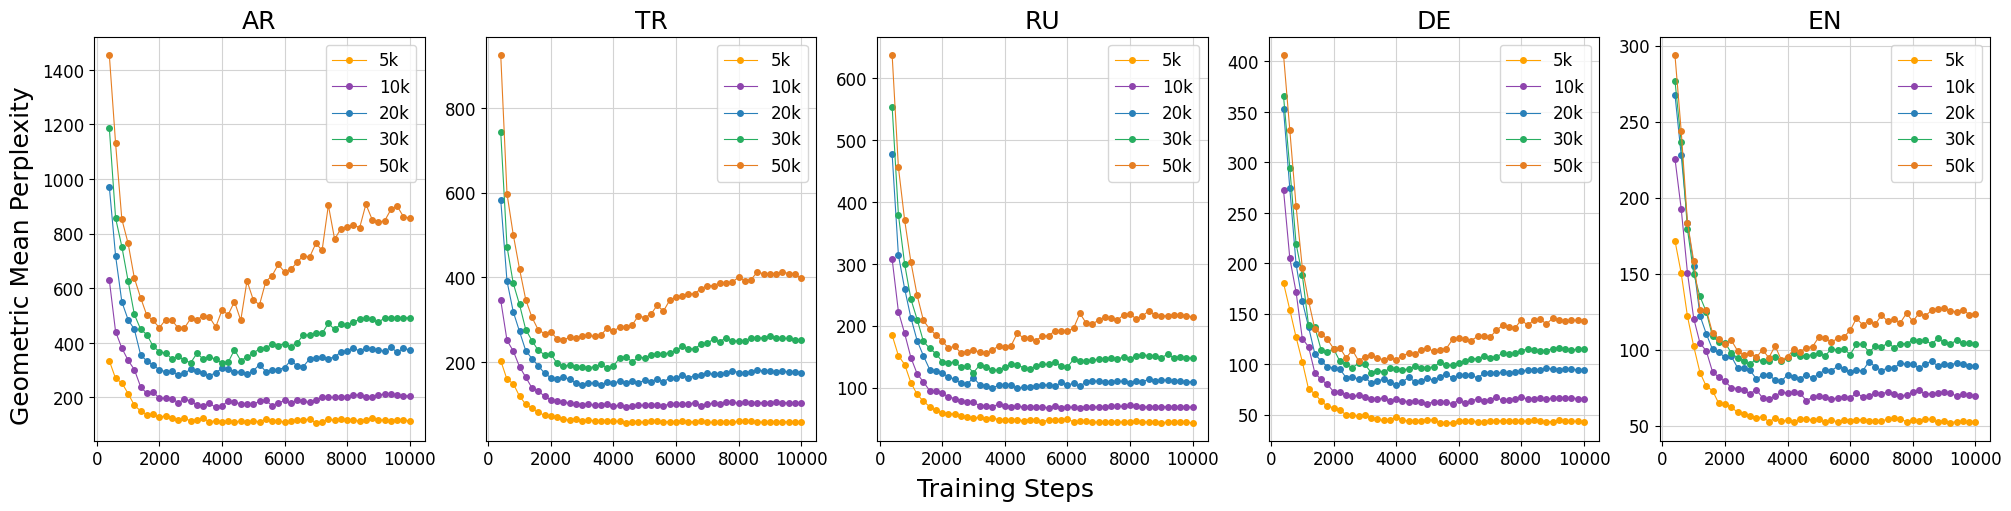

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from matplotlib import cm

SEEDS = [41]
CHECKPOINTS = list(range(400, 10000 + 1, 200))
lang_info = [
    [  # Arabic
        ("ar05k", "ar05k", "shuffle_control", "o", "-", "ar05k-shuffle_control", "5k"),
        ("ar1k", "ar1k", "shuffle_control", "o", "-", "ar1k-shuffle_control", "10k"),
        ("ar2k", "ar2k", "shuffle_control", "o", "-", "ar2k-shuffle_control", "20k"),
        ("ar3k", "ar3k", "shuffle_control", "o", "-", "ar10k-shuffle_control", "30k"),
        ("ar5k", "ar5k", "shuffle_control", "o", "-", "ar5k-shuffle_control", "50k"),
    ],
    [  # Turkish
        ("tr05k", "tr05k", "shuffle_control", "o", "-", "tr05k-shuffle_control", "5k"),
        ("tr1k", "tr1k", "shuffle_control", "o", "-", "tr1k-shuffle_control", "10k"),
        ("tr2k", "tr2k", "shuffle_control", "o", "-", "tr2k-shuffle_control", "20k"),
        ("tr3k", "tr3k", "shuffle_control", "o", "-", "tr10k-shuffle_control", "30k"),
        ("tr5k", "tr5k", "shuffle_control", "o", "-", "tr5k-shuffle_control", "50k"),
    ],
    [  # Russian
        ("ru05k", "ru05k", "shuffle_control", "o", "-", "ru05k-shuffle_control", "5k"),
        ("ru1k", "ru1k", "shuffle_control", "o", "-", "ru1k-shuffle_control", "10k"),
        ("ru2k", "ru2k", "shuffle_control", "o", "-", "ru2k-shuffle_control", "20k"),
        ("ru3k", "ru3k", "shuffle_control", "o", "-", "ru10k-shuffle_control", "30k"),
        ("ru5k", "ru5k", "shuffle_control", "o", "-", "ru10k-shuffle_control", "50k"),
    ],
    [  # German
        ("de05k", "de05k", "shuffle_control", "o", "-", "de05k-shuffle_control", "5k"),
        ("de1k", "de1k", "shuffle_control", "o", "-", "de1k-shuffle_control", "10k"),
        ("de2k", "de2k", "shuffle_control", "o", "-", "de2k-shuffle_control", "20k"),
        ("de3k", "de3k", "shuffle_control", "o", "-", "de10k-shuffle_control", "30k"),
        ("de5k", "de5k", "shuffle_control", "o", "-", "de10k-shuffle_control", "50k"),
    ],
    [  # English
        ("en05k", "en05k", "shuffle_control", "o", "-", "en05k-shuffle_control", "5k"),
        ("en1k", "en1k", "shuffle_control", "o", "-", "en1k-shuffle_control", "10k"),
        ("en2k", "en2k", "shuffle_control", "o", "-", "en2k-shuffle_control", "20k"),
        ("en3k", "en3k", "shuffle_control", "o", "-", "en10k-shuffle_control", "30k"),
        ("en5k", "en5k", "shuffle_control", "o", "-", "en10k-shuffle_control", "50k"),
    ],
]

COLOR_BY_VOCAB_SIZE = {
    "05k": "#ffa200",  
    "1k":  "#8e44ad",  
    "2k":  "#2980b9",  
    "3k":  "#27ae60", 
    "5k":  "#e67e22", 
}

LANG_CODES = ["ar", "tr", "ru", "de", "en"]
VOCAB_SIZES = ["05k", "1k", "2k", "3k", "5k"]

COLOR = {
    f"{lang}{size}": COLOR_BY_VOCAB_SIZE[size]
    for lang in LANG_CODES
    for size in VOCAB_SIZES
}
# title = ['10K','20K','30K','50K','100K', '150K'] 
title = ['AR','TR','RU','DE','EN'] 


def plot_mean_perplexities(ax, file_info, checkpoints, seeds):
    results_path = 'perplexity_results/{}_{}_{}/randinit_seed{}_train_{}_test_{}_{}_pretrained.csv'
    
    for file_data in file_info:
        lang, lang2, permutation, marker, linestyle, full_marker, legend_name = file_data
        all_seeds_gmeans = []
        for seed in seeds:
            try:
                df = pd.read_csv(results_path.format(permutation, lang2, permutation, seed, permutation, permutation, lang))
                gmeans = []
                valid_checkpoints = []

                for ckpt in checkpoints:
                    col_name = f"Perplexities (ckpt {ckpt})"
                    if col_name in df.columns:
                        gmeans.append(stats.gmean(df[col_name]))
                        valid_checkpoints.append(ckpt)

                all_seeds_gmeans.append(gmeans)
                # gmeans = [stats.gmean(df[f"Perplexities (ckpt {ckpt})"]) for ckpt in checkpoints]
                # all_seeds_gmeans.append(gmeans)
            except FileNotFoundError:
                print(f"文件未找到：{results_path.format(...)}")  # 请补全路径参数以调试

        all_seeds_gmeans = np.array(all_seeds_gmeans)
        means = np.mean(all_seeds_gmeans, axis=0)

        if len(seeds) > 1:
            sems = stats.sem(all_seeds_gmeans, axis=0)
            ci = 1.96 * sems
        else:
            ci = None

       
        colorp = COLOR[lang]

        if ci is not None:
            ax.errorbar(valid_checkpoints, means, yerr=ci, marker=marker, markersize=4, linewidth=0.8,
                        color=colorp, linestyle=linestyle, label=legend_name)
        else:
            ax.plot(valid_checkpoints, means, marker=marker, markersize=4, linewidth=0.8,
                    color=colorp, linestyle=linestyle, label=legend_name)
        ax.grid(True, color="lightgray")

def plot_perplexities_grid(file_infos_list, titles, checkpoints, seeds, colors, output_name):
    import numpy as np
    import matplotlib.pyplot as plt

    n = len(file_infos_list)
    fig, axes = plt.subplots(1, n, figsize=(20, 5), constrained_layout=True, sharex=True)
    axes = np.atleast_1d(axes)  # Handle single subplot case

    y_mins, y_maxs = [], []

    # First loop: plot and collect y-axis limits
    for i, (file_infos, title, color) in enumerate(zip(file_infos_list, titles, colors)):
        ax = axes[i]
        plot_mean_perplexities(ax, file_infos, checkpoints, seeds)
        ax.set_title(title, fontsize=18)
        ax.grid(True, color="lightgray")
        ax.tick_params(axis='both', labelsize=12)
        ax.legend(fontsize=12)
        # Store y-limits
        y_min, y_max = ax.get_ylim()
        y_mins.append(y_min)
        y_maxs.append(y_max)

    # Determine global y-axis limits
    # global_ymin = min(y_mins)
    # global_ymax = max(y_maxs)

    # Second loop: set the same y-axis scale for all plots
    # for ax in axes:
    #     ax.set_ylim(global_ymin, global_ymax)

    # Set common labels
    fig.supxlabel("Training Steps", size=18)
    fig.supylabel("Geometric Mean Perplexity", size=18)
    plt.savefig(output_name, bbox_inches='tight')
    plt.show()

# 创建颜色列表，每个子图使用相同颜色
# colors_list = [COLOR['shuffle_control']] * len(lang_info)
plot_perplexities_grid(lang_info, title, CHECKPOINTS, SEEDS, COLOR, 'vocab_size_plot_lang_10k.pdf')

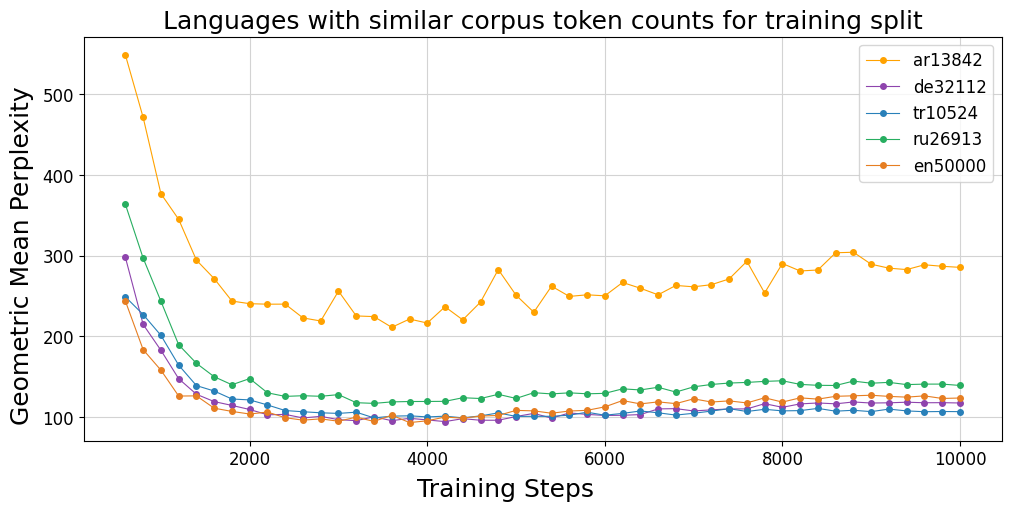

In [28]:
SEEDS = [41]
CHECKPOINTS = list(range(600, 10000 + 1, 200))
lang_info = [
    [  # English
        ("ar13842", "ar13842", "shuffle_control", "o", "-", "ar13842-shuffle_control", "ar13842"),
        ("de32112", "de32112", "shuffle_control", "o", "-", "de32112-shuffle_control", "de32112"),
        ("tr10524", "tr10524", "shuffle_control", "o", "-", "tr10524-shuffle_control", "tr10524"),
        ("ru26913", "ru26913", "shuffle_control", "o", "-", "ru26913-shuffle_control", "ru26913"),
        ("en5k", "en5k", "shuffle_control", "o", "-", "en50k-shuffle_control", "en50000"),
    ],
]

COLOR = {
    "ar13842": "#ffa200",  
    "de32112":  "#8e44ad",  
    "tr10524":  "#2980b9",  
    "ru26913":  "#27ae60", 
    "en50000":  "#e67e22", 
}

# LANG_CODES = ["ar", "tr", "ru", "de", "en"]
# VOCAB_SIZES = ["05k", "1k", "2k", "3k", "5k"]

# COLOR = {
#     f"{size}": COLOR_BY_VOCAB_SIZE[size]
#     for lang in LANG_CODES
#     for size in VOCAB_SIZES
# }
# title = ['10K','20K','30K','50K','100K', '150K'] 
title = ['Languages with similar corpus token counts for training split'] 


def plot_mean_perplexities(ax, file_info, checkpoints, seeds):
    results_path = 'perplexity_results/{}_{}_{}/randinit_seed{}_train_{}_test_{}_{}_pretrained.csv'
    
    for file_data in file_info:
        lang, lang2, permutation, marker, linestyle, full_marker, legend_name = file_data
        all_seeds_gmeans = []
        for seed in seeds:
            try:
                df = pd.read_csv(results_path.format(permutation, lang2, permutation, seed, permutation, permutation, lang))
                gmeans = []
                valid_checkpoints = []

                for ckpt in checkpoints:
                    col_name = f"Perplexities (ckpt {ckpt})"
                    if col_name in df.columns:
                        gmeans.append(stats.gmean(df[col_name]))
                        valid_checkpoints.append(ckpt)

                all_seeds_gmeans.append(gmeans)
                # gmeans = [stats.gmean(df[f"Perplexities (ckpt {ckpt})"]) for ckpt in checkpoints]
                # all_seeds_gmeans.append(gmeans)
            except FileNotFoundError:
                print(f"文件未找到：{results_path.format(...)}")  # 请补全路径参数以调试

        all_seeds_gmeans = np.array(all_seeds_gmeans)
        means = np.mean(all_seeds_gmeans, axis=0)

        if len(seeds) > 1:
            sems = stats.sem(all_seeds_gmeans, axis=0)
            ci = 1.96 * sems
        else:
            ci = None

       
        colorp = COLOR[legend_name]

        if ci is not None:
            ax.errorbar(valid_checkpoints, means, yerr=ci, marker=marker, markersize=4, linewidth=0.8,
                        color=colorp, linestyle=linestyle, label=legend_name)
        else:
            ax.plot(valid_checkpoints, means, marker=marker, markersize=4, linewidth=0.8,
                    color=colorp, linestyle=linestyle, label=legend_name)
        ax.grid(True, color="lightgray")

def plot_perplexities_grid(file_infos_list, titles, checkpoints, seeds, colors, output_name):
    import numpy as np
    import matplotlib.pyplot as plt

    n = len(file_infos_list)
    fig, axes = plt.subplots(1, n, figsize=(10, 5), constrained_layout=True, sharex=True)
    axes = np.atleast_1d(axes)  # Handle single subplot case

    y_mins, y_maxs = [], []

    # First loop: plot and collect y-axis limits
    for i, (file_infos, title, color) in enumerate(zip(file_infos_list, titles, colors)):
        ax = axes[i]
        plot_mean_perplexities(ax, file_infos, checkpoints, seeds)
        ax.set_title(title, fontsize=18)
        ax.grid(True, color="lightgray")
        ax.tick_params(axis='both', labelsize=12)
        ax.legend(fontsize=12)
        # Store y-limits
        y_min, y_max = ax.get_ylim()
        y_mins.append(y_min)
        y_maxs.append(y_max)

    # Determine global y-axis limits
    # global_ymin = min(y_mins)
    # global_ymax = max(y_maxs)

    # Second loop: set the same y-axis scale for all plots
    # for ax in axes:
    #     ax.set_ylim(global_ymin, global_ymax)

    # Set common labels
    fig.supxlabel("Training Steps", size=18)
    fig.supylabel("Geometric Mean Perplexity", size=18)
    plt.savefig(output_name, bbox_inches='tight')
    plt.show()

# 创建颜色列表，每个子图使用相同颜色
# colors_list = [COLOR['shuffle_control']] * len(lang_info)
plot_perplexities_grid(lang_info, title, CHECKPOINTS, SEEDS, COLOR, 'vocab_size_plot_lang_ctc.pdf')

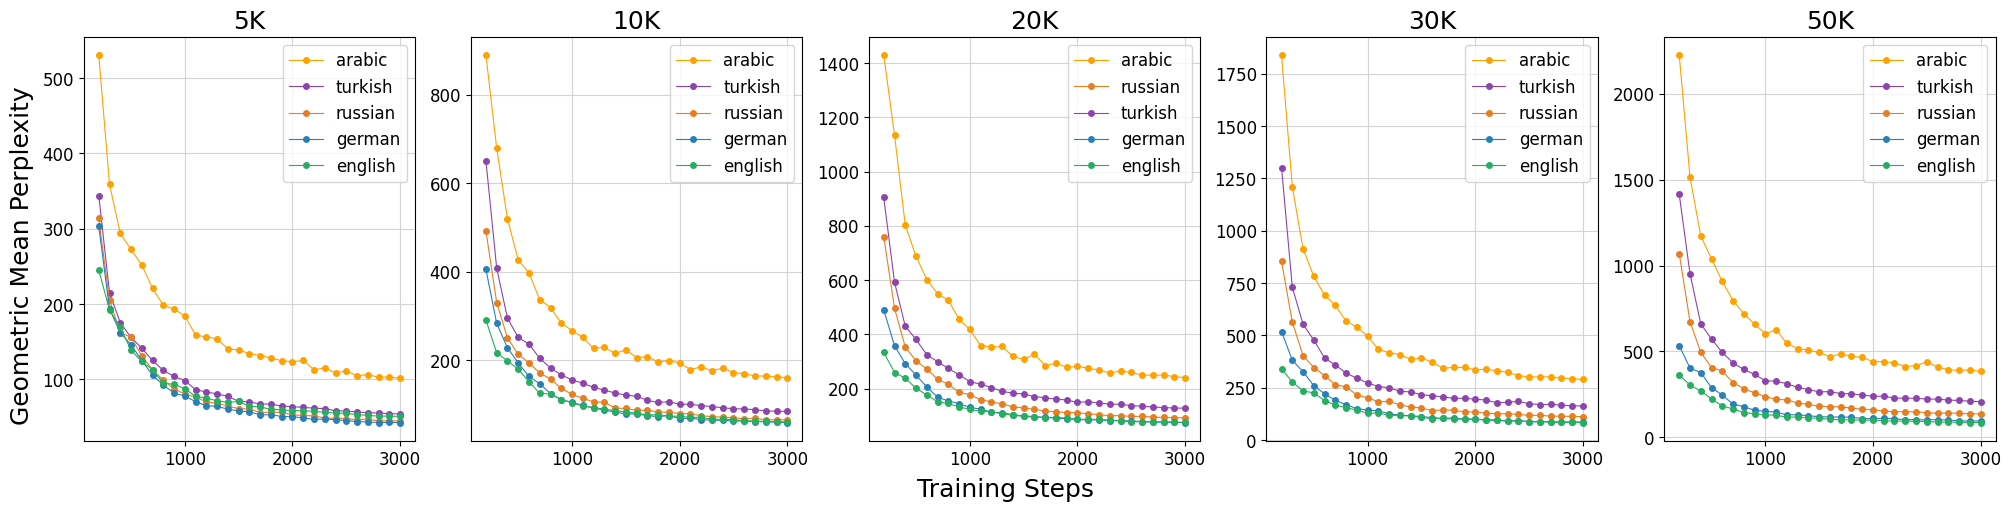

In [12]:
SEEDS = [41]
CHECKPOINTS = list(range(200, 3000 + 1, 100))
lang_info = [
    
    [   ("ar05k", "ar05k", "shuffle_control", "o", "-", 'ar05k-shuffle_control', 'arabic'),
       ("tr05k", "tr05k", "shuffle_control", "o", "-", 'tr1k-shuffle_control', 'turkish'),
         ("ru05k", "ru05k", "shuffle_control", "o", "-", 'ru1k-shuffle_control', 'russian'),
     ("de05k", "de05k", "shuffle_control", "o", "-", 'de1k-shuffle_control', 'german'),
         ("en05k", "en05k", "shuffle_control", "o", "-", 'en1k-shuffle_control', 'english'),
       
       ],
    [
        ("ar1k", "ar1k", "shuffle_control", "o", "-", 'ar1k-shuffle_control', 'arabic'),
        ("tr1k", "tr1k", "shuffle_control", "o", "-", 'tr1k-shuffle_control', 'turkish'),
         ("ru1k", "ru1k", "shuffle_control", "o", "-", 'ru1k-shuffle_control', 'russian'),
     ("de1k", "de1k", "shuffle_control", "o", "-", 'de1k-shuffle_control', 'german'),
         ("en1k", "en1k", "shuffle_control", "o", "-", 'en1k-shuffle_control', 'english'),
    
    ],
    [   
          ("ar2k", "ar2k", "shuffle_control", "o", "-", 'ar2k-shuffle_control', 'arabic'),
    ("ru2k", "ru2k", "shuffle_control", "o", "-", 'ru2k-shuffle_control', 'russian'),
        ("tr2k", "tr2k", "shuffle_control", "o", "-", 'tr2k-shuffle_control', 'turkish'),
         ("de2k", "de2k", "shuffle_control", "o", "-", 'de2k-shuffle_control', 'german'),
         ("en2k", "en2k", "shuffle_control", "o", "-", 'en2k-shuffle_control', 'english'),
    ],
     [   
          ("ar3k", "ar3k", "shuffle_control", "o", "-", 'ar10k-shuffle_control', 'arabic'),
         ("tr3k", "tr3k", "shuffle_control", "o", "-", 'tr10k-shuffle_control', 'turkish'),
          ("ru3k", "ru3k", "shuffle_control", "o", "-", 'ru10k-shuffle_control', 'russian'),
           ("de3k", "de3k", "shuffle_control", "o", "-", 'de10k-shuffle_control', 'german'),
      ("en3k", "en3k", "shuffle_control", "o", "-", 'en10k-shuffle_control', 'english'),
     
      ],
     [
         
         ("ar5k", "ar5k", "shuffle_control", "o", "-", 'ar5k-shuffle_control', 'arabic'),
         ("tr5k", "tr5k", "shuffle_control", "o", "-", 'tr5k-shuffle_control', 'turkish'),
      ("ru5k", "ru5k", "shuffle_control", "o", "-", 'ru10k-shuffle_control', 'russian'),
      ("de5k", "de5k", "shuffle_control", "o", "-", 'de10k-shuffle_control', 'german'),
      ("en5k", "en5k", "shuffle_control", "o", "-", 'en10k-shuffle_control', 'english'),
      
      
      ],
    #     [("tr10k", "tr10k", "shuffle_control", "o", "-", 'tr10k-shuffle_control', 'turkish'),],
    #    [ ("tr15k", "tr15k", "shuffle_control", "o", "-", 'tr15k-shuffle_control', 'turkish'),
    # ],
    # [("tr20k", "tr20k", "shuffle_control", "o", "-", 'tr20k-shuffle_control', 'attested'),],
]

COLOR = {
    
    
    "ar05k": "#ffa200",
    "ar1k": "#ffa200",
    "ar2k": "#ffa200",
    "ar3k": "#ffa200",
    "ar5k": "#ffa200",
    # Turkish keys – using a nice purple
    "tr05k": "#8e44ad",
    "tr1k": "#8e44ad",
    "tr2k": "#8e44ad",
    "tr3k": "#8e44ad",
    "tr5k": "#8e44ad",
    "tr10k": "#8e44ad",
    "tr15k": "#8e44ad",
    "tr20k": "#8e44ad",
    
    # German keys – using a cool blue
    "de05k": "#2980b9",
    "de1k": "#2980b9",
    "de2k": "#2980b9",
    "de3k": "#2980b9",
    "de5k": "#2980b9",
    
    # English keys – using a fresh green
    "en05k": "#27ae60",
    "en1k": "#27ae60",
    "en2k": "#27ae60",
    "en3k": "#27ae60",
    "en5k": "#27ae60",
    
    # Russian keys – using a vibrant orange
     "ru05k": "#e67e22",
    "ru1k": "#e67e22",
    "ru2k": "#e67e22",
    "ru3k": "#e67e22",
    "ru5k": "#e67e22",
}
# title = ['10K','20K','30K','50K','100K', '150K'] 
title = ['5K','10K','20K','30K','50K'] 


def plot_mean_perplexities(ax, file_info, checkpoints, seeds):
    results_path = 'perplexity_results/{}_{}_{}/randinit_seed{}_train_{}_test_{}_{}_pretrained.csv'
    
    for file_data in file_info:
        lang, lang2, permutation, marker, linestyle, full_marker, legend_name = file_data
        all_seeds_gmeans = []
        for seed in seeds:
            try:
                df = pd.read_csv(results_path.format(permutation, lang2, permutation, seed, permutation, permutation, lang))
                gmeans = []
                valid_checkpoints = []

                for ckpt in checkpoints:
                    col_name = f"Perplexities (ckpt {ckpt})"
                    if col_name in df.columns:
                        gmeans.append(stats.gmean(df[col_name]))
                        valid_checkpoints.append(ckpt)

                all_seeds_gmeans.append(gmeans)
                # gmeans = [stats.gmean(df[f"Perplexities (ckpt {ckpt})"]) for ckpt in checkpoints]
                # all_seeds_gmeans.append(gmeans)
            except FileNotFoundError:
                print(f"文件未找到：{results_path.format(...)}")  # 请补全路径参数以调试

        all_seeds_gmeans = np.array(all_seeds_gmeans)
        means = np.mean(all_seeds_gmeans, axis=0)

        if len(seeds) > 1:
            sems = stats.sem(all_seeds_gmeans, axis=0)
            ci = 1.96 * sems
        else:
            ci = None

       
        colorp = COLOR[lang]

        if ci is not None:
            ax.errorbar(valid_checkpoints, means, yerr=ci, marker=marker, markersize=4, linewidth=0.8,
                        color=colorp, linestyle=linestyle, label=legend_name)
        else:
            ax.plot(valid_checkpoints, means, marker=marker, markersize=4, linewidth=0.8,
                    color=colorp, linestyle=linestyle, label=legend_name)
        ax.grid(True, color="lightgray")

def plot_perplexities_grid(file_infos_list, titles, checkpoints, seeds, colors, output_name):
    import numpy as np
    import matplotlib.pyplot as plt

    n = len(file_infos_list)
    fig, axes = plt.subplots(1, n, figsize=(20, 5), constrained_layout=True, sharex=True)
    axes = np.atleast_1d(axes)  # Handle single subplot case

    y_mins, y_maxs = [], []

    # First loop: plot and collect y-axis limits
    for i, (file_infos, title, color) in enumerate(zip(file_infos_list, titles, colors)):
        ax = axes[i]
        plot_mean_perplexities(ax, file_infos, checkpoints, seeds)
        ax.set_title(title, fontsize=18)
        ax.grid(True, color="lightgray")
        ax.tick_params(axis='both', labelsize=12)
        ax.legend(fontsize=12)
        # Store y-limits
        y_min, y_max = ax.get_ylim()
        y_mins.append(y_min)
        y_maxs.append(y_max)

    # Determine global y-axis limits
    # global_ymin = min(y_mins)
    # global_ymax = max(y_maxs)

    # Second loop: set the same y-axis scale for all plots
    # for ax in axes:
    #     ax.set_ylim(global_ymin, global_ymax)

    # Set common labels
    fig.supxlabel("Training Steps", size=18)
    fig.supylabel("Geometric Mean Perplexity", size=18)
    plt.savefig(output_name, bbox_inches='tight')
    plt.show()

# 创建颜色列表，每个子图使用相同颜色
# colors_list = [COLOR['shuffle_control']] * len(lang_info)
plot_perplexities_grid(lang_info, title, CHECKPOINTS, SEEDS, COLOR, 'vocab_size_plot.pdf')

In [8]:
lang_info = [
     [
        ],
    [
        ("en5k", "en5k", "shuffle_control", "o", "-", 'en5k-shuffle_control', 'attested'),],
    [
        ("en3k", "tr3k", "shuffle_control", "o", "-", 'en3k-shuffle_control', 'attested'),],
    [
        ("tr5k", "tr5k", "shuffle_control", "o", "-", 'en5k-shuffle_control', 'attested'),],
        [("tr10k", "tr10k", "shuffle_control", "o", "-", 'tr10k-shuffle_control', 'attested'),],
       [ ("tr15k", "tr15k", "shuffle_control", "o", "-", 'tr15k-shuffle_control', 'attested'),
    ],
    [("tr20k", "tr20k", "shuffle_control", "o", "-", 'tr20k-shuffle_control', 'attested'),],
]
COLOR = {
    'de1k': '#f1a7a9',  
    'de2k': '#dd2c2f', 
     'de3k': '#ac1c1e', 
    'de5k': '#4e0110', 
    'tr1k': '#e2c6ff', 
    'tr2k': '#c4baff',
    'tr3k': '#9ba9ff', 
    'tr5k': '#624cab', 
   'en1k': '#ffff3f',  
    'en2k': '#d4d700',  
     'en3k': '#55a630', 
    'en5k': '#007f5f',
    'ru1k': '#a6e1fa',
     'ru2k': '#2196f3',  
     'ru3k': '#1976d2', 
    'ru5k': '#001233',
    
    
}
# title = ['EN30K','EN50k'] 
# plot_perplexities_grid(lang_info, title, CHECKPOINTS, SEEDS, COLOR, 'en.png')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

SEEDS = [41]
CHECKPOINTS = list(range(200, 900 + 1, 100))


lang_info = [
    [   ("de1k", "de1k", "shuffle_control", "o", "-", 'de1k-shuffle_control', 'de10k'),
        ("de2k", "de2k", "shuffle_control", "o", "-", 'de2k-shuffle_control', 'de20k'),
        ("de3k", "de3k", "shuffle_control", "o", "-", 'de3k-shuffle_control', 'de30k'),
        ("de5k", "de5k", "shuffle_control", "o", "-", 'de5k-shuffle_control', 'de50k'),
        ("en2k", "en2k", "shuffle_control", "o", "-", 'en2k-shuffle_control', 'en20k'),
        ("en3k", "en3k", "shuffle_control", "o", "-", 'en3k-shuffle_control', 'en30k'),
        ("en5k", "en5k", "shuffle_control", "o", "-", 'en5k-shuffle_control', 'en50k'),
        ("tr2k", "tr2k", "shuffle_control", "o", "-", 'tr2k-shuffle_control', 'tr20k'),
         ("tr3k", "tr3k", "shuffle_control", "o", "-", 'tr3k-shuffle_control', 'tr30k'),
           ("tr1k", "tr1k", "shuffle_control", "o", "-", 'tr1k-shuffle_control', 'tr10k'),
        ("tr5k", "tr5k", "shuffle_control", "o", "-", 'tr5k-shuffle_control', 'tr50k'),
         ("ru1k", "ru1k", "shuffle_control", "o", "-", 'ru1k-shuffle_control', 'ru10k'),
         ("ru2k", "ru2k", "shuffle_control", "o", "-", 'ru2k-shuffle_control', 'ru20k'),
         ("ru3k", "ru3k", "shuffle_control", "o", "-", 'ru3k-shuffle_control', 'ru30k'),
         ("ru5k", "ru5k", "shuffle_control", "o", "-", 'ru5k-shuffle_control', 'ru50k'),
        # ("tr10k", "tr10k", "shuffle_control", "s", "--", 'tr10k-shuffle_control', 'tr100k'),
        # ("tr15k", "tr15k", "shuffle_control", "^", ":", 'tr15k-shuffle_control', 'tr150k'),
    ],
]

# COLOR = {
#     "tr5k": "#A2B627",
#     'tr10k': '#BCBD22',
#     'tr15k': '#FFDC00',
#     'tr20k': '#2CA030',
# }
title = ['multilingual'] 

def plot_mean_perplexities(ax, file_info, checkpoints, seeds):
    results_path = 'perplexity_results/{}_{}_{}/randinit_seed{}_train_{}_test_{}_{}_pretrained.csv'
    for file_data in file_info:
        lang, lang2, permutation, marker, linestyle, full_marker, legend_name = file_data
        all_seeds_gmeans = []

        for seed in seeds:
            try:
                # 读取CSV文件（请确保路径正确！）
                path = results_path.format(
                    permutation, lang2, permutation, seed, permutation, permutation, lang
                )
                df = pd.read_csv(path)
                # 计算几何平均
                gmeans = [stats.gmean(df[f"Perplexities (ckpt {ckpt})"]) for ckpt in checkpoints]
                all_seeds_gmeans.append(gmeans)
            except FileNotFoundError:
                print(f"文件未找到：{path}")

        all_seeds_gmeans = np.array(all_seeds_gmeans)
        means = np.mean(all_seeds_gmeans, axis=0)

        # 计算置信区间（如果SEEDS数量>1）
        if len(seeds) > 1:
            sems = stats.sem(all_seeds_gmeans, axis=0)
            # Calculate confidence interval using t-distribution
            ci_lower, ci_upper = stats.t.interval(0.95, df=len(seeds)-1,
                                                loc=means, scale=sems)
            ci = (ci_upper - ci_lower) / 2

        
        else:
            ci = None
            
        colorp = COLOR[lang]
        errorbar_kwargs = {
            'marker': marker,
            'markersize': 6,
            'linewidth': 1,
            'color': colorp,
            'linestyle': linestyle,
            'label': legend_name 
        }
        if ci is not None:
            ax.errorbar(checkpoints, means, yerr=ci, **errorbar_kwargs)
        else:
            ax.plot(checkpoints, means, **errorbar_kwargs)
        ax.grid(True, color="lightgray", linestyle="--", alpha=0.7)

def plot_perplexities_grid(file_infos_list, titles, checkpoints, seeds, output_name):
    n = len(file_infos_list)
    fig, axes = plt.subplots(1, n, figsize=(8, 5), constrained_layout=True, sharex=True)
    axes = np.atleast_1d(axes)  # 处理单子图情况

    for i, (file_infos, title_text) in enumerate(zip(file_infos_list, titles)):
        ax = axes[i]
        plot_mean_perplexities(ax, file_infos, checkpoints, seeds)
        ax.set_title(title_text, fontsize=14, pad=15)
        ax.tick_params(axis='both', labelsize=10)
        
       
        ax.legend(
            fontsize=10,
            loc='upper right',  
            frameon=True,
            framealpha=0.8,
            edgecolor='black'
        )

    fig.supxlabel("Training Steps", fontsize=12)
    fig.supylabel("Geometric Mean Perplexity", fontsize=12)
    plt.savefig(output_name, bbox_inches='tight', dpi=300)
    plt.show()

plot_perplexities_grid(lang_info, title, CHECKPOINTS, SEEDS, 'tr_with_legend.pdf')

In [389]:
from pathlib import Path
hans = Path('/Users/xiulinyang/Downloads/hans-data.txt').read_text().strip().split('\n')
with open('hans.txt', 'w') as h:
    for exp in hans[1:]:
        sent1 = exp.split('\t')[0]
        sent2 = exp.split('\t')[1]
        h.write(f'{sent1}\n{sent2}\n')

In [3]:
import pandas as pd

languages = ['EN2k', 'EN3k', 'EN5k']
perp_diff_all = []
for lang in languages:
    categories={}
    pred_perp = pd.read_csv(f'blimps_results/shuffle_control_{lang}/randinit_seed41_shuffle_control.csv').to_dict(orient='records') 
    print(pred_perp[:10])
            
            # for check in range(0, 1201, 100):
            #     dif = 0
            #     c=0
            #     correct_num =0
            #     incorrect_num =0
            #     checkpoint_name = f'Perplexities (ckpt {str(check)})'
            #     for i, example in enumerate(a):
            #         if example['Sentences']!=b[i]['Sentences']:
            #             c+=1
            #             correct = b[i][checkpoint_name]
            #             incorrect = example[checkpoint_name]
            #             diff=correct-incorrect #negative scores are more frequent
            #             dif+=diff
            #     perp_diff[f'acc_checkpoint{str(check)}'] =dif/c
            # perp_diff_all.append(perp_diff)
            # 
    

{'DE1k': {100: 0.6335944299390774, 200: 0.6910356832027851, 300: 0.7228024369016536, 400: 0.741514360313316, 500: 0.7667536988685814, 600: 0.7693646649260226, 700: 0.7889469103568321, 800: 0.7889469103568321, 900: 0.7919930374238469}, 'DE2k': {100: 0.6510008703220191, 200: 0.7071366405570061, 300: 0.7315056570931244, 400: 0.7489120974760661, 500: 0.783289817232376, 600: 0.7946040034812881, 700: 0.7898172323759791, 800: 0.7828546562228025, 900: 0.7806788511749347}, 'DE3k': {100: 0.6932114882506527, 200: 0.7219321148825065, 300: 0.7428198433420365, 400: 0.7606614447345518, 500: 0.7928633594429939, 600: 0.7850304612706701, 700: 0.7811140121845083, 800: 0.7954743255004352, 900: 0.7972149695387293}, 'DE5k': {100: 0.7249782419495213, 200: 0.762402088772846, 300: 0.7436901653611836, 400: 0.7658833768494343, 500: 0.7915578764142733, 600: 0.793733681462141, 700: 0.7972149695387293, 800: 0.7967798085291558, 900: 0.7867711053089643}}


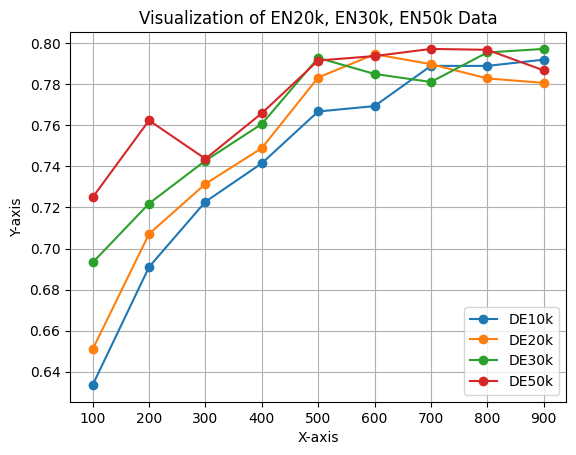

In [15]:
languages=['DE1k', 'DE2k', 'DE3k', 'DE5k']
langs_dict={'DE1k':'DE10k','DE2k': 'DE20k', 'DE3k':'DE30k', 'DE5k':'DE50k'}
languages=['RU1k', 'RU2k', 'RU3k', 'RU5k']
langs_dict={'RU1k':'RU10k','RU2k': 'RU20k', 'RU3k':'RU30k', 'RU5k':'RU50k'}
languages = ['EN2k', 'EN3k', 'EN5k']
langs_dict={'EN2k': 'EN20k', 'EN3k':'EN30k', 'EN5k':'EN50k'}
acc_all_langs = {}
for lang in languages:
    acc_all_langs[lang] = []
    categories={}
    pred_perp = pd.read_csv(f'multiblimp_results/shuffle_control_{lang}/randinit_seed41_shuffle_control.csv').to_dict(orient='records')
    for category in pred_perp:
        cat = category['Categories']
        if cat not in categories:
            categories[cat] = []
            categories[cat].append(category)
        else:
            categories[cat].append(category)
    category_acc ={}

    for checkpoint in CHECKPOINTS:
        correct_count = 0
        all_count = 0
        for cat in categories:
            if 'incorrect' not in cat:
                correct = categories[cat]
                incorrect_cat = '_'.join(cat.split('_')[:-2])+'_incorrect_affected.test'
                incorrect = categories[incorrect_cat]

                for cor, incor in zip(correct, incorrect):
                    all_count += 1
                    sent_correct = cor['Sentences']
                    sent_incorrect = incor['Sentences']
                    overlap= [x for x in sent_correct.split() if x in sent_incorrect.split()]
                    # if len(overlap)<len(sent_incorrect.split())-2:
                    #     print(sent_incorrect, sent_correct)

                    correct_perp = cor[f'Perplexities (ckpt {checkpoint})']
                    incorrect_perp = incor[f'Perplexities (ckpt {checkpoint})']
                    if correct_perp < incorrect_perp:
                        correct_count += 1

        accuracy = correct_count / all_count

        category_acc[checkpoint] = accuracy

    acc_all_langs[lang] = category_acc

print(acc_all_langs)
df = pd.DataFrame(acc_all_langs)
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=langs_dict[column])

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# plt.title("Visualization of DE10k DE20k, DE30k, DE50k Data")
# plt.title("Visualization of RU10k RU20k, RU30k, RU50k Data")
plt.title("Visualization of EN20k, EN30k, EN50k Data")
plt.legend()
plt.grid(True)
plt.savefig('DE_multiblimp_overall.pdf')
plt.show()

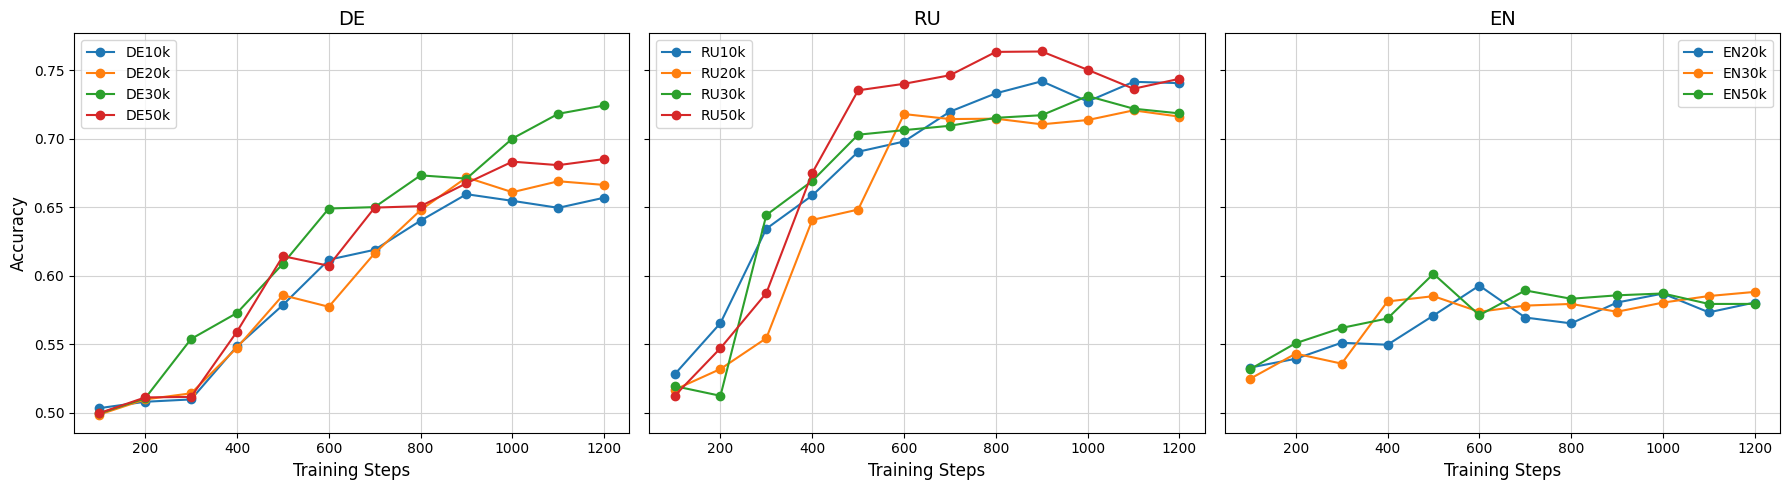

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (Assume CHECKPOINTS is defined; for example:)
CHECKPOINTS = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

# Define groups for DE, RU, and EN
language_groups = {
    "DE": {
        "languages": ['DE1k', 'DE2k', 'DE3k', 'DE5k'],
        "langs_dict": {'DE1k':'DE10k','DE2k': 'DE20k', 'DE3k':'DE30k', 'DE5k':'DE50k'},
        "output": "DE_multiblimp_overall.pdf",
        "title": "DE"
    },
    "RU": {
        "languages": ['RU1k', 'RU2k', 'RU3k', 'RU5k'],
        "langs_dict": {'RU1k':'RU10k','RU2k': 'RU20k', 'RU3k':'RU30k', 'RU5k':'RU50k'},
        "output": "RU_multiblimp_overall.pdf",
        "title": "RU"
    },
    #   "TR": {
    #     "languages": ['TR1k', 'TR2k', 'TR3k', 'TR5k'],
    #     "langs_dict": {'TR1k':'TR10k','TR2k': 'TR20k', 'TR3k':'TR30k', 'TR5k':'TR50k'},
    #     "output": "RU_multiblimp_overall.pdf",
    #     "title": "TR"
    # },
    "EN": {
        "languages": ['EN2k', 'EN3k', 'EN5k'],
        "langs_dict": {'EN2k': 'EN20k', 'EN3k':'EN30k', 'EN5k':'EN50k'},
        "output": "EN_multiblimp_overall.pdf",
        "title": "EN"
    }
}

def compute_language_accuracy(lang, checkpoints):
    """
    Read the CSV for the given language, group by category,
    compute accuracy per checkpoint as:
      correct_count / all_count
    using your logic (where a lower perplexity on the 'correct' sentence
    compared to a paired 'incorrect' sentence counts as correct).
    Returns a dictionary mapping checkpoint -> accuracy.
    """
    acc = {}
    # Read predictions (each row is a record)
    csv_path = f"clams_results/shuffle_control_{lang}/randinit_seed41_shuffle_control.csv"
    pred_perp = pd.read_csv(csv_path).to_dict(orient='records')
    
    # Group the records by the category name
    categories = {}
    for entry in pred_perp:
        cat = entry['Categories']
        if cat not in categories:
            categories[cat] = []
        categories[cat].append(entry)
        
    # Loop over checkpoints and compute accuracy
    for checkpoint in checkpoints:
        correct_count = 0
        all_count = 0
        for cat in categories:
            # Only process "correct" categories
            if 'incorrect' not in cat:
                correct_entries = categories[cat]
                # Build the name for the paired incorrect category:
                incorrect_cat = '_'.join(cat.split('_')[:-2]) + '_incorrect_affected.test'
                # Skip if the paired category is missing
                if incorrect_cat not in categories:
                    continue
                incorrect_entries = categories[incorrect_cat]
                
                # Assuming each correct and incorrect pair are aligned:
                for cor, incor in zip(correct_entries, incorrect_entries):
                    all_count += 1
                    correct_perp = cor[f'Perplexities (ckpt {checkpoint})']
                    incorrect_perp = incor[f'Perplexities (ckpt {checkpoint})']
                    if correct_perp < incorrect_perp:
                        correct_count += 1
        # Avoid division by zero
        acc[checkpoint] = correct_count / all_count if all_count > 0 else None
    return acc

num_groups = len(language_groups)
fig, axes = plt.subplots(1, num_groups, figsize=(6*num_groups, 5), sharey=True)

for ax, (grp_name, grp_info) in zip(axes, language_groups.items()):
    languages = grp_info["languages"]
    langs_dict = grp_info["langs_dict"]
    acc_all_langs = {}
    
    for lang in languages:
        acc_all_langs[lang] = compute_language_accuracy(lang, CHECKPOINTS)
    
    df = pd.DataFrame(acc_all_langs)
    
    for column in df.columns:
        ax.plot(df.index, df[column], marker='o', label=langs_dict[column])
        
    ax.set_xlabel("Training Steps", fontsize=12)
    ax.set_title(grp_info["title"], fontsize=14)
    ax.grid(True, color="lightgray")
    ax.legend(fontsize=10)
    
axes[0].set_ylabel("Accuracy", fontsize=12)
plt.tight_layout()
plt.savefig("combined_clams_overall.pdf", bbox_inches='tight')
plt.show()

In [30]:
import math
from pathlib import Path
rom torch.hub import ENV_GITHUB_TOKEN
from transformers import AutoTokenizer, AutoModel
from pathlib import Path
import math
from tqdm import tqdm
TOKENIZER_DICT = {
    "EN": "gpt2",
    "DE": "malteos/gpt2-xl-wechsel-german",
    "RU": "sberbank-ai/rugpt3large_based_on_gpt2",
    "TR": "ytu-ce-cosmos/turkish-gpt2",
    "AR": "aubmindlab/aragpt2-base",

    "EN05k": "/scratch/xiulyang/multilingual-LM/tokenizers/EN/5000",
    "DE05k": "/scratch/xiulyang/multilingual-LM/tokenizers/DE/5000",
    "RU05k": "/scratch/xiulyang/multilingual-LM/tokenizers/RU/5000",
    "TR05k": "/scratch/xiulyang/multilingual-LM/tokenizers/TR/5000",
    "AR05k": "/scratch/xiulyang/multilingual-LM/tokenizers/AR/5000",

    "EN1k": "/scratch/xiulyang/multilingual-LM/tokenizers/EN/10000",
    "DE1k": "/scratch/xiulyang/multilingual-LM/tokenizers/DE/10000",
    "RU1k": "/scratch/xiulyang/multilingual-LM/tokenizers/RU/10000",
    "TR1k": "/scratch/xiulyang/multilingual-LM/tokenizers/TR/10000",
    "AR1k": "/scratch/xiulyang/multilingual-LM/tokenizers/AR/10000",

    "EN2k": "/scratch/xiulyang/multilingual-LM/tokenizers/EN/20000",
    "DE2k": "/scratch/xiulyang/multilingual-LM/tokenizers/DE/20000",
    "RU2k": "/scratch/xiulyang/multilingual-LM/tokenizers/RU/20000",
    "TR2k": "/scratch/xiulyang/multilingual-LM/tokenizers/TR/20000",
    "AR2k": "/scratch/xiulyang/multilingual-LM/tokenizers/AR/20000",

    "EN3k": "/scratch/xiulyang/multilingual-LM/tokenizers/EN/30000",
    "DE3k": "/scratch/xiulyang/multilingual-LM/tokenizers/DE/30000",
    "RU3k": "/scratch/xiulyang/multilingual-LM/tokenizers/RU/30000",
    "TR3k": "/scratch/xiulyang/multilingual-LM/tokenizers/TR/30000",
    "AR3k": "/scratch/xiulyang/multilingual-LM/tokenizers/AR/30000",

    "EN5k": "/scratch/xiulyang/multilingual-LM/tokenizers/EN/50000",
    "DE5k": "/scratch/xiulyang/multilingual-LM/tokenizers/DE/50000",
    "RU5k": "/scratch/xiulyang/multilingual-LM/tokenizers/RU/50000",
    "TR5k": "/scratch/xiulyang/multilingual-LM/tokenizers/TR/50000",
    "AR5k": "/scratch/xiulyang/multilingual-LM/tokenizers/AR/50000",
    }

with open('tokenization_results_bits.tsv', 'w', encoding='utf-8') as f:
    for language in tqdm(TOKENIZER_DICT):
        tokenizer = AutoTokenizer.from_pretrained(TOKENIZER_DICT[language])
        if language.startswith("EN"):
            lang='EN'
        elif language.startswith("DE"):
            lang='DE'
        elif language.startswith("RU"):
            lang='RU'
        elif language.startswith("TR"):
            lang='TR'
        elif language.startswith("AR"):
            lang='AR'
        else:
            raise ValueError ('This language is not supported yet!')
        sents = Path(f'/scratch/xiulyang/multilingual-LM/data/multilingual/{lang}/train/{lang}.train').read_text().strip().split('\n')
        token_num =0
        bits_num = 0
        
        for sent in tqdm(sents):
            bits = []
            tokens = tokenizer.tokenize(sent)
            for tok in tokens:
                tok_bits = tok.encode('utf-8')
                bits.extend(tok_bits)
            token_num += len(tokens)
            bits_num += len(bits)
            
        ratio = token_num/bits_num
        bpb = ratio*
        average = int(token_num/len(sents))
        print(lang, average)
        f.write(f'{language}\t{token_num}\t{len(sents)}\t{average}\n')

def compute_bpb(loss, token_length, byte_length):
    """
    Compute Bits Per Byte (BPB) from:
    - loss: negative log likelihood loss (in natural log, i.e., base e)
    - token_length: total number of tokens (L_T)
    - byte_length: total number of bytes in UTF-8 (L_B)
    """
    ratio = token_length / byte_length  # L_T / L_B
    bpb = ratio * loss / math.log(2)    # (L_T / L_B) * (loss / ln(2))
    return bpb

language_groups = ['EN', 'AR', 'DE', 'RU', 'TR']
for lang in language_groups:
    lang_path = f'/scratch/xiulyang/multilingual-LM/data/multilingual/{lang}/train/{lang}.train'
    lang_file = ' '.join(Path(lang_path).read_text().strip().split('\n'))
    lb = len(lang_file.encode('utf-8'))
    print(f"Length in UTF-8 bytes for {lang}: {lb}")

Length in UTF-8 bytes: 6
